In [ ]:
import os
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
from torchaudio.transforms import MelSpectrogram, AmplitudeToDB
from tqdm import tqdm
import librosa
import numpy as np
import miditoolkit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
import random
import pretty_midi

from symusic import Score
from miditok import REMI, TokenizerConfig
from midiutil import MIDIFile
from glob import glob
# used chatgpt to help me generate some functions

In [82]:
import os
from pathlib import Path
import miditoolkit
from miditok import REMI, TokenizerConfig
from tqdm import tqdm

def clean_midi(midi_path, save_path):
    """
    Cleans a MIDI file by setting a fixed tempo and quantizing note timings.
    """
    midi = miditoolkit.MidiFile(midi_path)

    # Set tempo to a consistent value
    midi.tempo_changes = [miditoolkit.TempoChange(120, 0)]

    # Quantize notes to the nearest 60 ticks (quarter note if 480 TPQ)
    for inst in midi.instruments:
        for note in inst.notes:
            note.start = round(note.start / 60) * 60
            note.end = round(note.end / 60) * 60

    midi.dump(save_path)

def preprocess_directory(input_dir, output_dir):
    """
    Processes all MIDI files in the input_dir and saves cleaned files to output_dir.
    """
    os.makedirs(output_dir, exist_ok=True)
    midi_files = [f for f in os.listdir(input_dir) if f.endswith(('.mid', '.midi'))]
    
    for file in tqdm(midi_files, desc="Cleaning MIDIs"):
        in_path = os.path.join(input_dir, file)
        out_path = os.path.join(output_dir, file)
        try:
            clean_midi(in_path, out_path)
        except Exception as e:
            print(f"Failed to process {file}: {e}")

def tokenize_midis(input_dir, output_dir):
    """
    Tokenizes cleaned MIDI files using miditok.
    """
    config = TokenizerConfig(
        pitch_range=(36, 96),
        beat_res={(0, 4): 8, (4, 12): 4},
        use_programs=False,
        use_chords=False,
        use_tempos=False,
        use_rests=True
    )
    tokenizer = REMI(config)

    midi_paths = list(Path(input_dir).glob("*.mid"))
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    for midi_path in tqdm(midi_paths, desc="Tokenizing MIDIs"):
        try:
            tokenizer.tokenize_midi(midi_path, Path(output_dir) / (midi_path.stem + ".json"))
        except Exception as e:
            print(f"Failed to tokenize {midi_path.name}: {e}")

if __name__ == "__main__":
    raw_dir = "nes_midis"
    cleaned_dir = "cleaned_midis"
    tokenized_dir = "tokenized_midis"

    preprocess_directory(raw_dir, cleaned_dir)
    tokenize_midis(cleaned_dir, tokenized_dir)


Cleaning MIDIs:  14%|█▎        | 272/2000 [00:12<02:07, 13.53it/s]

Failed to process 1154_ff1airs.mid: Could not decode key with 2 flats and mode 255
Failed to process 1158_ff1fightgs1.mid: data byte must be in range 0..127


Cleaning MIDIs:  15%|█▍        | 294/2000 [00:13<00:56, 29.97it/s]

Failed to process 1168_ff1cave1.mid: Could not decode key with 4 flats and mode 255
Failed to process 1171_ff1cast2.mid: data byte must be in range 0..127


Cleaning MIDIs:  15%|█▌        | 303/2000 [00:14<01:09, 24.35it/s]

Failed to process 1182_ff1gurgu.mid: data byte must be in range 0..127


Cleaning MIDIs:  17%|█▋        | 338/2000 [00:16<01:20, 20.61it/s]

Failed to process 1211_ff1ship3.mid: data byte must be in range 0..127


Cleaning MIDIs:  19%|█▊        | 372/2000 [00:18<01:33, 17.33it/s]

Failed to process 1245_ff2jbat3.mid: data byte must be in range 0..127


Cleaning MIDIs:  19%|█▉        | 384/2000 [00:18<00:58, 27.48it/s]

Failed to process 1258_ff2jfin2.mid: data byte must be in range 0..127


Cleaning MIDIs:  34%|███▎      | 673/2000 [00:31<00:45, 29.10it/s]

Failed to process 1516_gotcha_level2.mid: data byte must be in range 0..127


Cleaning MIDIs:  34%|███▍      | 678/2000 [00:31<00:54, 24.39it/s]

Failed to process 1528_gradius2.mid: Could not decode key with 1 flats and mode 255


Cleaning MIDIs:  34%|███▍      | 687/2000 [00:32<00:53, 24.54it/s]

Failed to process 1530_Grad12_1.mid: data byte must be in range 0..127
Failed to process 1535_gradius5.mid: Could not decode key with 5 flats and mode 255


Cleaning MIDIs:  41%|████▏     | 829/2000 [00:40<00:33, 35.15it/s]

Failed to process 1657_Iceclimber.mid: data byte must be in range 0..127


Cleaning MIDIs:  45%|████▍     | 898/2000 [00:44<00:59, 18.55it/s]

Failed to process 1725_jplv1.mid: data byte must be in range 0..127


Cleaning MIDIs:  45%|████▌     | 907/2000 [00:45<00:43, 25.15it/s]

Failed to process 1728_jplv2_v1.1.mid: data byte must be in range 0..127


Cleaning MIDIs:  48%|████▊     | 952/2000 [00:47<00:49, 21.00it/s]

Failed to process 1777_Kirby_Boss.mid: data byte must be in range 0..127


Cleaning MIDIs:  49%|████▉     | 989/2000 [00:50<00:51, 19.64it/s]

Failed to process 1808_vegetablevalley.mid: data byte must be in range 0..127


Cleaning MIDIs:  57%|█████▋    | 1140/2000 [00:57<00:25, 33.36it/s]

Failed to process 1934_ZeldaMelody.mid: data byte must be in range 0..127


Cleaning MIDIs:  68%|██████▊   | 1366/2000 [01:11<00:19, 32.28it/s]

Failed to process 367_Bbtitle.mid: Could not decode key with 2 flats and mode 255


Cleaning MIDIs:  92%|█████████▏| 1839/2000 [01:43<00:10, 14.79it/s]

Failed to process 837_DD.mid: data byte must be in range 0..127


Cleaning MIDIs:  95%|█████████▌| 1902/2000 [01:47<00:07, 12.26it/s]

Failed to process 899_dm_fever.mid: data byte must be in range 0..127


Cleaning MIDIs:  96%|█████████▌| 1913/2000 [01:48<00:06, 13.75it/s]

Failed to process 908_dm_options.mid: data byte must be in range 0..127


Cleaning MIDIs:  98%|█████████▊| 1954/2000 [01:51<00:01, 24.31it/s]

Failed to process 951_Castle.mid: data byte must be in range 0..127


Cleaning MIDIs:  98%|█████████▊| 1964/2000 [01:51<00:01, 21.99it/s]

Failed to process 956_dw2town.mid: data byte must be in range 0..127


Cleaning MIDIs:  99%|█████████▉| 1988/2000 [01:53<00:00, 12.96it/s]

Failed to process 985_Zoma3Heavy.mid: data byte must be in range 0..127


Tokenizing MIDIs: 100%|██████████| 1975/1975 [00:00<00:00, 109275.66it/s]

Failed to tokenize 001_10-Yard_Fight-Kick_Off.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 002_1943.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 003_1943sab.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 004_1943-lev1.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 005_43pbos1.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 006_43pbos12.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 007_1943-lev3.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 008_1943-Lev3Win.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 009_1943lost.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 010_1943won.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 011_1943boss.mid: 'REMI' object has no attribute 'tokenize_midi'
Failed to tokenize 012_1943boss1.mid: 'REMI' object has no attr

In [83]:
# Processing the midi files
midi_files = glob('nes_midis/*')
print(len(midi_files))

config = TokenizerConfig(num_velocities=1)
tokenizer = REMI(config)
tokenizer.train(vocab_size = 2000, files_paths=midi_files)

2000


In [ ]:
from miditoolkit import MidiFile

# Clean MIDI files and filter valid ones
clean_midi_files = []
for path in midi_files:
    try:
        midi = MidiFile(path)
        if len(midi.instruments) == 0:
            continue
        clean_midi_files.append(path)
    except Exception as e:
        print(f"Skipping invalid file: {path}, reason: {e}")

print(f"Cleaned MIDI files: {len(clean_midi_files)}")


Skipping invalid file: nes_midis\1154_ff1airs.mid, reason: Could not decode key with 2 flats and mode 255
Skipping invalid file: nes_midis\1158_ff1fightgs1.mid, reason: data byte must be in range 0..127
Skipping invalid file: nes_midis\1168_ff1cave1.mid, reason: Could not decode key with 4 flats and mode 255
Skipping invalid file: nes_midis\1171_ff1cast2.mid, reason: data byte must be in range 0..127
Skipping invalid file: nes_midis\1182_ff1gurgu.mid, reason: data byte must be in range 0..127
Skipping invalid file: nes_midis\1211_ff1ship3.mid, reason: data byte must be in range 0..127
Skipping invalid file: nes_midis\1245_ff2jbat3.mid, reason: data byte must be in range 0..127
Skipping invalid file: nes_midis\1258_ff2jfin2.mid, reason: data byte must be in range 0..127
Skipping invalid file: nes_midis\1516_gotcha_level2.mid, reason: data byte must be in range 0..127
Skipping invalid file: nes_midis\1528_gradius2.mid, reason: Could not decode key with 1 flats and mode 255
Skipping inval

In [85]:
instruments = {}
bad_files = []

for file in midi_files:
    try:
        midi = pretty_midi.PrettyMIDI(file)
        for instrument in midi.instruments:
            name = pretty_midi.program_to_instrument_name(instrument.program)
            instruments[name] = instruments.get(name, 0) + 1
    except Exception as e:
        bad_files.append(file)

instrument_popularity = sorted(instruments, key = lambda k: instruments[k], reverse = True)

In [ ]:
len(bad_files)

25

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import miditoolkit
import numpy as np
from miditok import REMI, TokSequence

# ===== Dataset =====
class MusicDataset(Dataset):
    def __init__(self, files, tokenizer, max_len=1024):
        self.samples = []
        self.tokenizer = tokenizer  # Store tokenizer reference
        
        for path in files:
            try:
                midi = miditoolkit.MidiFile(path)
                if len(midi.instruments) < 1:
                    continue
                
                # Use miditok's tokenization method correctly
                mel_tokens = tokenizer(midi)  # This returns token IDs or TokSequence
                
                # Debug: print the type and structure}
                if len(self.samples) == 0:  # Only print for first file
                    print(f"Tokenizer output type: {type(mel_tokens)}")
                    if hasattr(mel_tokens, '__len__'):
                        print(f"Length: {len(mel_tokens)}")
                    if isinstance(mel_tokens, (list, tuple)) and len(mel_tokens) > 0:
                        print(f"First element type: {type(mel_tokens[0])}")
                        if hasattr(mel_tokens[0], '__dict__'):
                            print(f"First element attributes: {list(mel_tokens[0].__dict__.keys())}")
                
                # Handle different tokenization output formats
                if isinstance(mel_tokens, list):
                    if len(mel_tokens) == 0:
                        continue
                    # Could be list of TokSequence objects or list of integers
                    if hasattr(mel_tokens[0], 'ids'):
                        mel_ids = mel_tokens[0].ids  # TokSequence object
                    else:
                        mel_ids = mel_tokens  # List of integers
                elif hasattr(mel_tokens, 'ids'):
                    mel_ids = mel_tokens.ids  # Single TokSequence object
                elif isinstance(mel_tokens, (list, tuple)):
                    mel_ids = list(mel_tokens)  # Direct token list
                else:
                    print(f"Unexpected tokenizer output type: {type(mel_tokens)}")
                    continue
                
                # Truncate to reasonable length
                mel_ids = mel_ids[:max_len-1]  # Leave room for special tokens
                
                # Add BOS token if it exists
                bos_token = None
                eos_token = None
                pad_token = 0
                
                # Try to get special tokens safely
                try:
                    if hasattr(tokenizer, 'special_tokens_ids'):
                        bos_token = tokenizer.special_tokens_ids.get('BOS_None')
                        eos_token = tokenizer.special_tokens_ids.get('EOS_None')
                        pad_token = tokenizer.special_tokens_ids.get('PAD_None', 0)
                    elif hasattr(tokenizer, '__getitem__'):
                        # Try dictionary-style access
                        try:
                            bos_token = tokenizer['BOS_None']
                        except (KeyError, TypeError):
                            pass
                        try:
                            eos_token = tokenizer['EOS_None'] 
                        except (KeyError, TypeError):
                            pass
                except:
                    pass
                
                # Build input sequence
                if bos_token is not None:
                    x = [bos_token] + mel_ids
                else:
                    x = mel_ids
                
                # For autoregressive training, y is x shifted by 1
                if eos_token is not None:
                    y = x[1:] + [eos_token]
                else:
                    y = x[1:] + [x[-1]]  # Use last token if no EOS
                
                # Ensure same length
                min_len = min(len(x), len(y))
                x = x[:min_len]
                y = y[:min_len]
                
                # Pad to max_len if needed
                while len(x) < max_len:
                    x.append(pad_token)
                    y.append(-100)  # Ignore padding in loss
                
                # Truncate if too long
                x = x[:max_len]
                y = y[:max_len]
                
                self.samples.append((x, y))
                
            except Exception as e:
                print(f"Error processing {path}: {e}")
                continue
        
        print(f"Loaded {len(self.samples)} samples from {len(files)} files.")
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, i):
        try:
            x, y = self.samples[i]
            return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)
        except:
            # Return dummy data if anything fails
            return torch.zeros(1024, dtype=torch.long), torch.full((1024,), -100, dtype=torch.long)

# ===== Model =====
class TransformerDecoder(nn.Module):
    def __init__(self, vocab_size, emb=256, heads=8, layers=6, dropout=0.1, max_len=1024):
        super().__init__()
        self.vocab_size = vocab_size
        self.token_emb = nn.Embedding(vocab_size, emb)
        self.pos_emb = nn.Parameter(torch.zeros(1, max_len, emb))
        
        # Use regular transformer layers with causal masking
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=emb, nhead=heads, dropout=dropout, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=layers)
        self.lm_head = nn.Linear(emb, vocab_size)
        self.dropout = nn.Dropout(dropout)
        
        # Initialize weights properly
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
    
    def forward(self, x):
        seq_len = x.size(1)
        
        # Clamp input tokens to valid range
        x = torch.clamp(x, 0, self.vocab_size - 1)
        
        # Token and position embeddings
        tok_emb = self.token_emb(x)
        pos_emb = self.pos_emb[:, :seq_len]
        embeddings = self.dropout(tok_emb + pos_emb)
        
        # Create causal mask
        mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool().to(x.device)
        
        # Apply transformer
        out = self.transformer(embeddings, mask=mask)
        return self.lm_head(out)

# ===== Train Loop =====
import math 

def train(model, loader, optimizer, device, clip_grad=1.0, max_batches=None):
    model.train()
    total_loss = 0
    num_batches = 0
    
    for batch_idx, (x, y) in enumerate(loader):
        if max_batches is not None and batch_idx >= max_batches:
            break

        x, y = x.to(device), y.to(device)
        
        if x.max() >= model.vocab_size or x.min() < 0:
            print(f"Warning: Clamping invalid token IDs: min={x.min()}, max={x.max()}")
            x = torch.clamp(x, 0, model.vocab_size - 1)
        
        logits = model(x)
        logits_flat = logits.view(-1, logits.size(-1))
        y_flat = y.view(-1)
        
        if torch.isnan(logits_flat).any() or torch.isinf(logits_flat).any():
            print(f"NaN/inf detected in logits at batch {batch_idx}, skipping")
            continue
        
        loss = nn.CrossEntropyLoss(ignore_index=-100)(logits_flat, y_flat)
        
        if torch.isnan(loss) or torch.isinf(loss):
            print(f"NaN/inf loss at batch {batch_idx}, skipping")
            continue
        
        optimizer.zero_grad()
        loss.backward()
        if clip_grad > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip_grad)
        optimizer.step()
        
        total_loss += loss.item()
        num_batches += 1
        
        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx}, Loss: {loss.item():.4f}, Perplexity: {math.exp(loss.item()):.2f}")
    
    avg_loss = total_loss / max(num_batches, 1)
    avg_ppl = math.exp(avg_loss)
    print(f"Average loss: {avg_loss:.4f}, Perplexity: {avg_ppl:.2f}")
    return avg_loss




# ===== Generation Functions =====
def generate_autoregressive(model, start_tokens, tokenizer, max_len=512, temperature=1.0, top_k=50):
    model.eval()
    generated = start_tokens[:]
    
    with torch.no_grad():
        for _ in range(max_len - len(generated)):
            # Prepare input
            x = torch.tensor(generated, dtype=torch.long).unsqueeze(0)
            if torch.cuda.is_available():
                x = x.cuda()
            
            # Get predictions
            logits = model(x)
            logits = logits[0, -1, :] / temperature
            
            # Apply top-k filtering if specified
            if top_k > 0:
                top_k_logits, top_k_indices = torch.topk(logits, top_k)
                logits = torch.full_like(logits, float('-inf'))
                logits[top_k_indices] = top_k_logits
            
            # Sample next token
            probs = torch.softmax(logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1).item()
            
            generated.append(next_token)
            
            # Check for EOS token
            eos_token = None
            try:
                if hasattr(tokenizer, 'special_tokens_ids'):
                    if isinstance(tokenizer.special_tokens_ids, dict):
                        eos_token = tokenizer.special_tokens_ids.get('EOS_None', None)
                    elif hasattr(tokenizer, '__getitem__'):
                        try:
                            eos_token = tokenizer['EOS_None']
                        except (KeyError, TypeError):
                            pass
                elif hasattr(tokenizer, '__getitem__'):
                    try:
                        eos_token = tokenizer['EOS_None']
                    except (KeyError, TypeError):
                        pass
            except:
                pass
            
            if eos_token is not None and next_token == eos_token:
                break
    
    return generated

def save_tokens_to_midi(token_ids, tokenizer, filename="generated.mid"):
    try:
        # Create TokSequence
        seq = TokSequence(ids=token_ids)
        
        # Decode to score
        score = tokenizer.decode([seq])
        
        # Try different save methods
        if hasattr(score, 'dump_midi'):
            score.dump_midi(filename)
        elif hasattr(score, 'to_midi'):
            midi = score.to_midi()
            if hasattr(midi, 'write'):
                midi.write(filename)
            else:
                midi.dump(filename)
        else:
            # Fallback: use miditok's direct conversion
            midi = tokenizer.tokens_to_midi([seq])
            midi.dump(filename)
        
        print(f"Successfully saved MIDI to {filename}")
        
    except Exception as e:
        print(f"Error saving MIDI: {e}")
        # Try alternative approach
        try:
            from miditok.utils import tokens_to_midi
            midi = tokens_to_midi(token_ids, tokenizer)
            midi.dump(filename)
            print(f"Saved MIDI using fallback method to {filename}")
        except Exception as e2:
            print(f"Fallback method also failed: {e2}")

# ===== Main Training Script =====
if __name__ == "__main__":
    # Initialize tokenizer
    tokenizer = REMI()
    
    # Assuming midi_files is defined elsewhere
    # files = midi_files  # Replace with your file list
    
    # Create dataset and loader
    # dataset = MusicDataset(files, tokenizer, max_len=512)
    # loader = DataLoader(dataset, batch_size=4, shuffle=True)
    
    # Initialize model
    vocab_size = len(tokenizer.vocab) if hasattr(tokenizer, 'vocab') else tokenizer.vocab_size
    model = TransformerDecoder(vocab_size=vocab_size, max_len=512)
    
    if torch.cuda.is_available():
        model = model.cuda()
        print("Using GPU")
    
    # Optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
    
    # Training loop
    # for epoch in range(5):
    #     print(f"Epoch {epoch + 1}/5")
    #     train(model, loader, optimizer, device="cuda" if torch.cuda.is_available() else "cpu")
    
    print("Model setup complete!")

def interactive_generate_continuation(model, tokenizer, midi_folder='nes_midis/', prompt_len=50, gen_len=256):
    import glob
    import miditoolkit

    # List MIDI files in folder
    midi_files = glob.glob(midi_folder + '*.mid')
    if len(midi_files) == 0:
        print(f"No MIDI files found in {midi_folder}")
        return

    print("Available MIDI files:")
    for i, f in enumerate(midi_files):
        print(f"{i}: {f}")

    # User input
    idx = int(input(f"Enter MIDI file index (0 to {len(midi_files)-1}): "))
    chosen_file = midi_files[idx]
    print(f"Selected: {chosen_file}")

    # Load and tokenize
    midi = miditoolkit.MidiFile(chosen_file)
    tokens_seq = tokenizer(midi)
    if isinstance(tokens_seq, list):
        tokens = tokens_seq[0].ids
    else:
        tokens = tokens_seq.ids

    print(f"Total tokens in MIDI: {len(tokens)}")

    # Use first prompt_len tokens as prompt
    prompt_tokens = tokens[:prompt_len]
    print(f"Using first {prompt_len} tokens as prompt.")

    # Generate continuation
    generated = generate_autoregressive(model, prompt_tokens, tokenizer, max_len=prompt_len + gen_len)
    print(f"Generated {len(generated) - len(prompt_tokens)} new tokens.")

    # Save to MIDI file
    output_filename = f"generated_continuation_{idx}.mid"
    save_tokens_to_midi(generated, tokenizer, output_filename)
    print(f"Saved generated MIDI as {output_filename}")


# ===== Usage Example for Generation =====
def generate_music_example(model, tokenizer, loader):
    """Conditioned music generation using a melody as input"""
    
    # Use a specific MIDI as condition
    melody_condition = extract_melody_tokens(midi_files[0], tokenizer, max_len=32)
    start_tokens = melody_condition

    print(f"Using {len(start_tokens)} melody tokens as prompt")

    # Generate continuation
    generated_tokens = generate_autoregressive(
        model, start_tokens, tokenizer,
        max_len=256, temperature=0.8, top_k=40
    )

    print(f"Generated {len(generated_tokens)} tokens")

    # Save to MIDI
    save_tokens_to_midi(generated_tokens, tokenizer, "conditioned_generation.mid")
    return generated_tokens


def extract_melody_tokens(midi_path, tokenizer, max_len=64):
    """Extract melody (single instrument) and convert to tokens"""
    midi = miditoolkit.MidiFile(midi_path)
    if not midi.instruments:
        raise ValueError("No instruments found.")
    
    # Select only the first instrument (assumed melody)
    melody_instr = midi.instruments[0]
    new_midi = miditoolkit.MidiFile()
    new_midi.instruments = [melody_instr]
    new_midi.ticks_per_beat = midi.ticks_per_beat
    new_midi.tempo_changes = midi.tempo_changes
    
    tokens = tokenizer(new_midi)
    
    # Handle single or batched token output
    if isinstance(tokens, list) and hasattr(tokens[0], 'ids'):
        token_ids = tokens[0].ids
    elif hasattr(tokens, 'ids'):
        token_ids = tokens.ids
    else:
        token_ids = tokens  # Assume already ids
    
    return token_ids[:max_len]


def evaluate(model, loader, device):
    model.eval()
    total_loss = 0
    num_batches = 0

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            logits_flat = logits.view(-1, logits.size(-1))
            y_flat = y.view(-1)
            loss = nn.CrossEntropyLoss(ignore_index=-100)(logits_flat, y_flat)
            total_loss += loss.item()
            num_batches += 1

    avg_loss = total_loss / max(num_batches, 1)
    perplexity = math.exp(avg_loss)
    print(f"Validation Perplexity: {perplexity:.2f}")
    return perplexity



Using GPU
Model setup complete!


Tokenizer output type: <class 'list'>
Length: 1
First element type: <class 'miditok.classes.TokSequence'>
First element attributes: ['tokens', 'ids', 'bytes', 'events', 'are_ids_encoded', '_ticks_bars', '_ticks_beats', '_ids_decoded']


C:\Users\edwin\AppData\Local\Temp\ipykernel_20308\2397107520.py:21: UserWarning: You are using a depreciated `miditoolkit.MidiFile` object. MidiTokis now (>v3.0.0) using symusic.Score as MIDI backend. Your file willbe converted on the fly, however please consider using symusic.
  mel_tokens = tokenizer(midi)  # This returns token IDs or TokSequence


Loaded 1975 samples from 1975 files.

Epoch 1
Batch 0, Loss: 5.7420, Perplexity: 311.67
Batch 10, Loss: 4.7578, Perplexity: 116.49
Batch 20, Loss: 4.8889, Perplexity: 132.81
Batch 30, Loss: 4.0881, Perplexity: 59.63
Batch 40, Loss: 3.4823, Perplexity: 32.54
Average loss: 4.4355, Perplexity: 84.39

Epoch 2
Batch 0, Loss: 3.9059, Perplexity: 49.70
Batch 10, Loss: 3.4603, Perplexity: 31.83
Batch 20, Loss: 3.3003, Perplexity: 27.12
Batch 30, Loss: 3.1239, Perplexity: 22.73
Batch 40, Loss: 2.9962, Perplexity: 20.01
Average loss: 3.2762, Perplexity: 26.47

Epoch 3
Batch 0, Loss: 2.7534, Perplexity: 15.70
Batch 10, Loss: 3.2844, Perplexity: 26.69
Batch 20, Loss: 2.8586, Perplexity: 17.44
Batch 30, Loss: 2.6406, Perplexity: 14.02
Batch 40, Loss: 2.4538, Perplexity: 11.63
Average loss: 2.8181, Perplexity: 16.74

Epoch 4
Batch 0, Loss: 3.1590, Perplexity: 23.55
Batch 10, Loss: 2.0739, Perplexity: 7.96
Batch 20, Loss: 2.7660, Perplexity: 15.89
Batch 30, Loss: 2.5917, Perplexity: 13.35
Batch 40, L

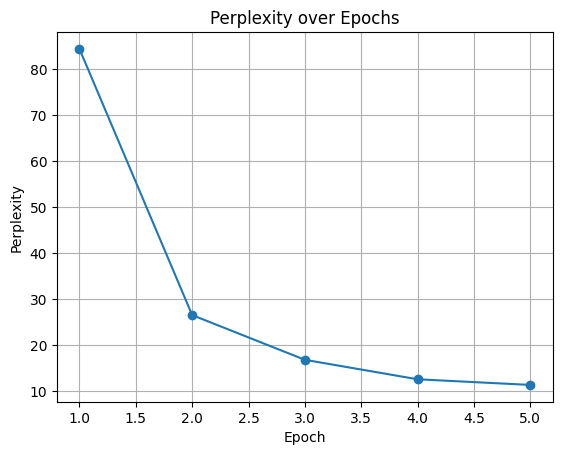

In [ ]:
# 1. Train the model
tokenizer = REMI()
files = clean_midi_files
dataset = MusicDataset(files, tokenizer, max_len=512)
loader = DataLoader(dataset, batch_size=4, shuffle=True)
model = TransformerDecoder(vocab_size=tokenizer.vocab_size, max_len=512).cuda()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# Train for a few epochs
import matplotlib.pyplot as plt

perplexities = []

for epoch in range(5):
    print(f"\nEpoch {epoch + 1}")
    avg_loss = train(model, loader, optimizer, "cuda", max_batches=50)
    avg_ppl = math.exp(avg_loss)
    perplexities.append(avg_ppl)

# Plot perplexity over epochs
plt.plot(range(1, len(perplexities) + 1), perplexities, marker='o')
plt.title("Perplexity over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.grid(True)
plt.show()




In [89]:
# Generate from an existing dataset sample
generated_tokens = generate_music_example(model, tokenizer, loader)

# Interactively generate based on a specific MIDI file in the folder
interactive_generate_continuation(model, tokenizer, midi_folder='nes_midis/', prompt_len=50, gen_len=256)


C:\Users\edwin\AppData\Local\Temp\ipykernel_20308\2397107520.py:415: UserWarning: You are using a depreciated `miditoolkit.MidiFile` object. MidiTokis now (>v3.0.0) using symusic.Score as MIDI backend. Your file willbe converted on the fly, however please consider using symusic.
  tokens = tokenizer(new_midi)


Using 32 melody tokens as prompt
Generated 256 tokens
Successfully saved MIDI to conditioned_generation.mid
Available MIDI files:
0: nes_midis\001_10-Yard_Fight-Kick_Off.mid
1: nes_midis\002_1943.mid
2: nes_midis\003_1943sab.mid
3: nes_midis\004_1943-lev1.mid
4: nes_midis\005_43pbos1.mid
5: nes_midis\006_43pbos12.mid
6: nes_midis\007_1943-lev3.mid
7: nes_midis\008_1943-Lev3Win.mid
8: nes_midis\009_1943lost.mid
9: nes_midis\010_1943won.mid
10: nes_midis\011_1943boss.mid
11: nes_midis\012_1943boss1.mid
12: nes_midis\013_1943BossWin.mid
13: nes_midis\014_1999.mid
14: nes_midis\015_3D_Worldrunner_Bonus.mid
15: nes_midis\016_3D_Worldrunner_Boss.mid
16: nes_midis\017_3D_Worldrunner_Main.mid
17: nes_midis\018_720.mid
18: nes_midis\019_Egypt.mid
19: nes_midis\020_8_Eyes_-_Enterance.mid
20: nes_midis\021_8_Eyes.mid
21: nes_midis\022_8eyes-spain1.mid
22: nes_midis\023_blob.mid
23: nes_midis\024_blob_title.mid
24: nes_midis\025_elmst.mid
25: nes_midis\026_elm_street_metal.mid
26: nes_midis\027_zz

C:\Users\edwin\AppData\Local\Temp\ipykernel_20308\2397107520.py:357: UserWarning: You are using a depreciated `miditoolkit.MidiFile` object. MidiTokis now (>v3.0.0) using symusic.Score as MIDI backend. Your file willbe converted on the fly, however please consider using symusic.
  tokens_seq = tokenizer(midi)


Generated 256 new tokens.
Successfully saved MIDI to generated_continuation_5.mid
Saved generated MIDI as generated_continuation_5.mid


In [90]:
midi = miditoolkit.MidiFile("generated_music.mid")
print(f"Ticks per beat: {midi.ticks_per_beat}")
print(f"Tempo changes: {len(midi.tempo_changes)}")
print(f"Number of tracks: {len(midi.instruments)}")

total_notes = 0
for i, track in enumerate(midi.instruments):
    num_notes = len(track.notes)
    total_notes += num_notes
    print(f"Track {i}: {num_notes} notes, program {track.program}")
    
    if num_notes > 0:
        pitches = [note.pitch for note in track.notes]
        velocities = [note.velocity for note in track.notes]
        avg_velocity = sum(velocities) / len(velocities)
        print(f"  Pitch range: {min(pitches)}-{max(pitches)}")
        print(f"  Average volume: {avg_velocity:.1f}/127")
        print(f"  First note: pitch {track.notes[0].pitch}, start {track.notes[0].start}")

print(f"Total notes: {total_notes}")
if total_notes == 0:
    print("No notes found")
else:
    print("MIDI contains notes and should make sound")

Ticks per beat: 8
Tempo changes: 1
Number of tracks: 1
Track 0: 63 notes, program 0
  Pitch range: 29-74
  Average volume: 119.0/127
  First note: pitch 29, start 24
Total notes: 63
MIDI contains notes and should make sound
